In [379]:
import json
from datetime import datetime, timedelta

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
import plotly.io as pio
# pio.templates
# default is "plotly"
pio.templates.default = "plotly_white"

In [200]:
pd.options.plotting.backend = "plotly"

# All data

In [36]:
df = pd.read_csv("cleaned_all.csv")
df.Date = pd.to_datetime(df.Date, format='%Y-%m-%d')
df.set_index('Date', inplace=True)
df.head()

,Recovered,Cumulative Recovered,Imported Case,Local Case,Active Case,New Case,Cumulative Case,ICU,Ventilator,Death,Cumulative Death,SMA_new,EMA_0.1,EMA_0.3,SMA_death
Date,,,,,,,,,,,,,,,
2020-03-27,44,259,NaN,NaN,1876,130,2161,54,34,3,26,130.00,130.00,130.00,3.00
2020-03-28,61,320,NaN,NaN,1973,159,2320,73,54,1,27,144.50,145.26,147.06,2.00
2020-03-29,68,388,NaN,NaN,2048,150,2470,73,52,7,34,146.33,147.01,148.40,3.67
2020-03-30,91,479,NaN,NaN,2110,156,2626,94,62,3,37,148.75,149.62,151.40,3.50
2020-03-31,58,537,NaN,NaN,2186,140,2766,94,60,6,43,147.00,147.27,147.29,4.00


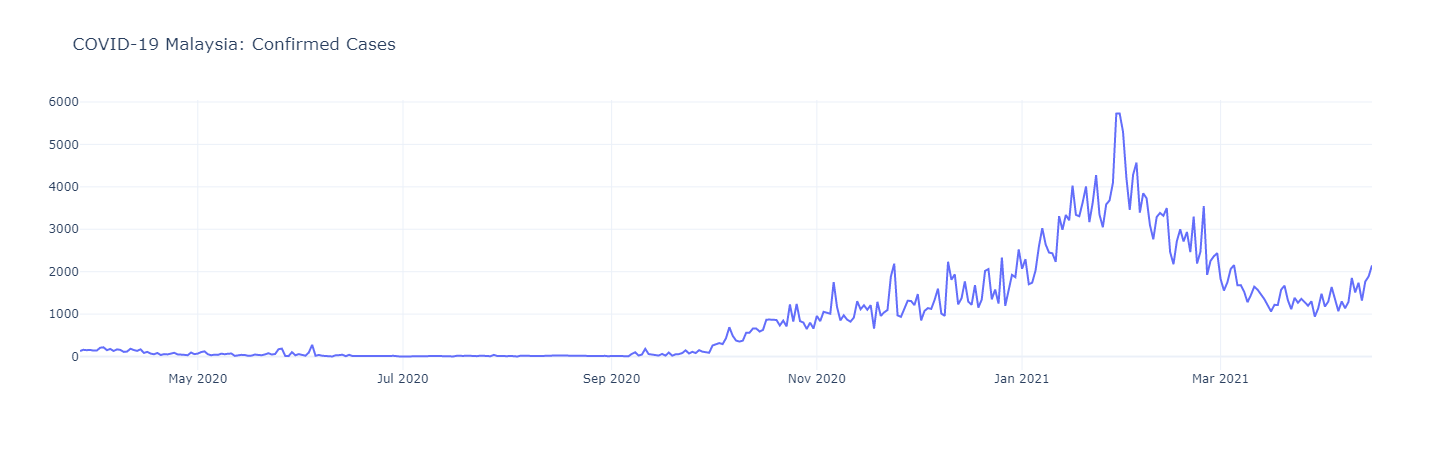

In [5]:
fig = px.line(df, x=df.index, y='New Case', title='COVID-19 Malaysia: Confirmed Cases')
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()

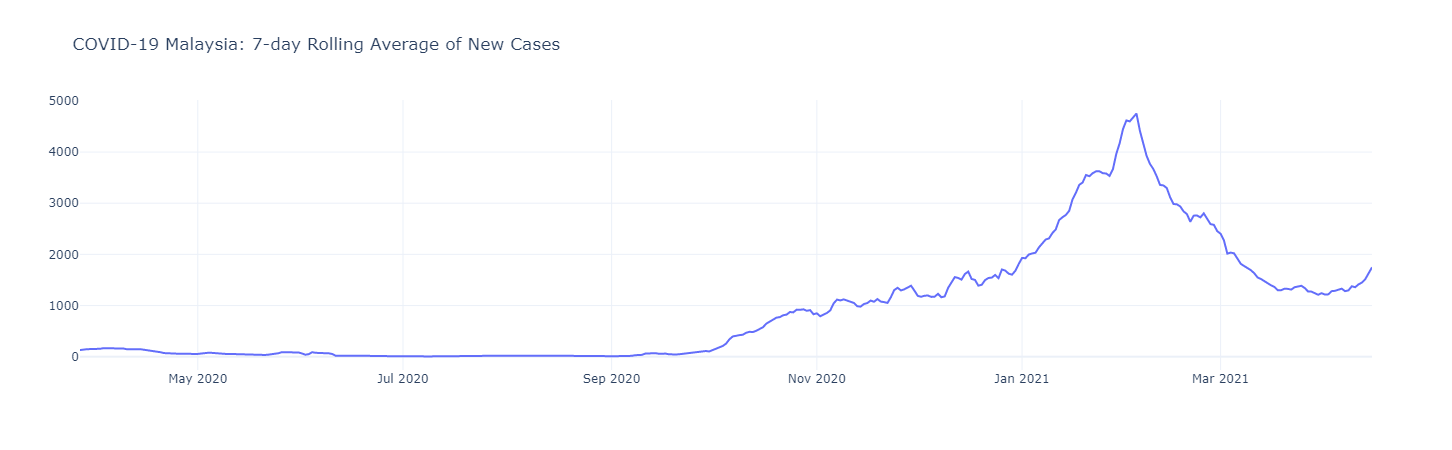

In [6]:
fig = px.line(df, x=df.index, y='SMA_new', title=f'COVID-19 Malaysia: 7-day Rolling Average of New Cases')
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()

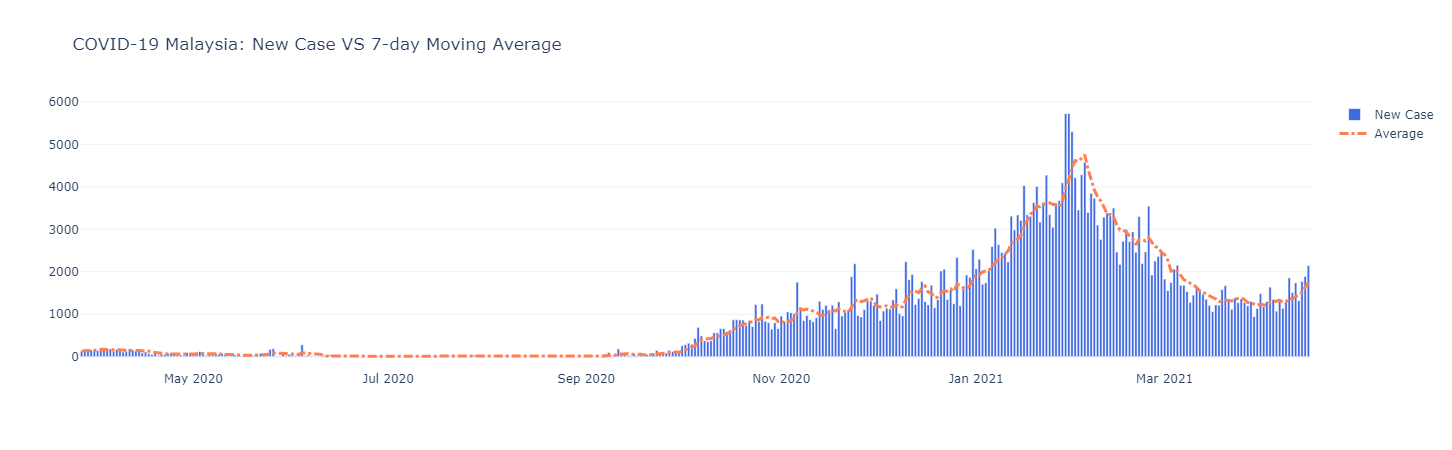

In [316]:
fig = go.Figure()
fig.add_trace(go.Bar(x=df.index, y=df['New Case'],
                     marker_color='royalblue',
                     name='New Case'))
fig.add_trace(go.Scatter(x=df.index, y=df['SMA_new'],
                         line=dict(color='coral', dash='dashdot', width=3),
                         name='Average'))
fig.update_layout(title='COVID-19 Malaysia: New Case VS 7-day Moving Average',
                  xaxis_title=None, yaxis_title=None)
fig.update_layout(hovermode="x unified")
# fig.update_xaxes(rangeslider_visible=True)
# Remove floating menu and unnecesary dialog box
fig.show(config={"displayModeBar": False})
# fig.show()

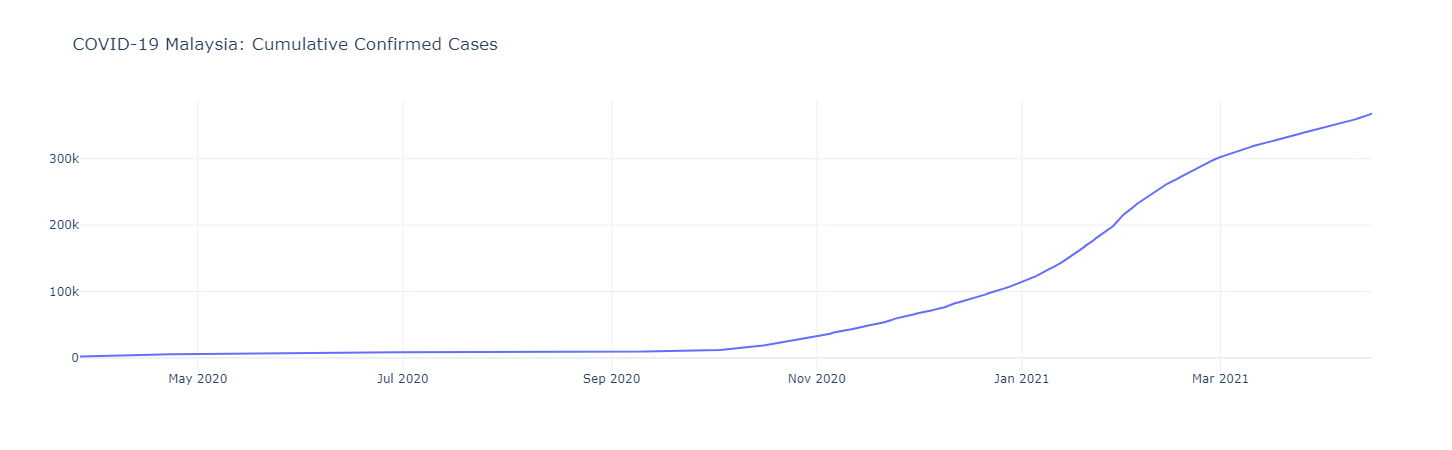

In [8]:
fig = px.line(df, x=df.index, y='Cumulative Case', title='COVID-19 Malaysia: Cumulative Confirmed Cases')
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()

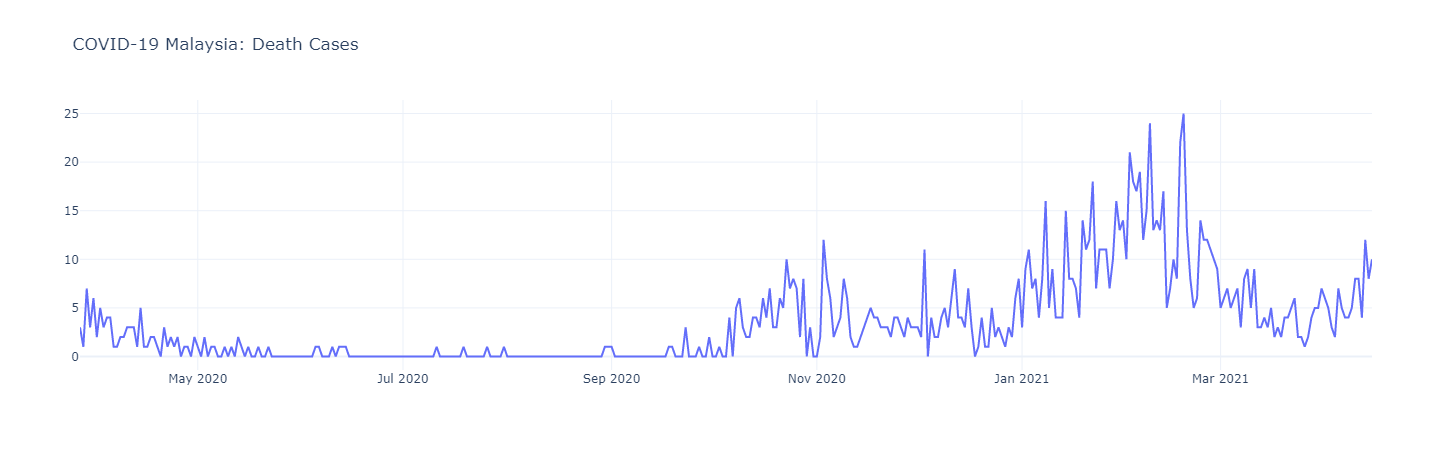

In [9]:
fig = px.line(df, x=df.index, y='Death', title='COVID-19 Malaysia: Death Cases', template='plotly_white')
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()

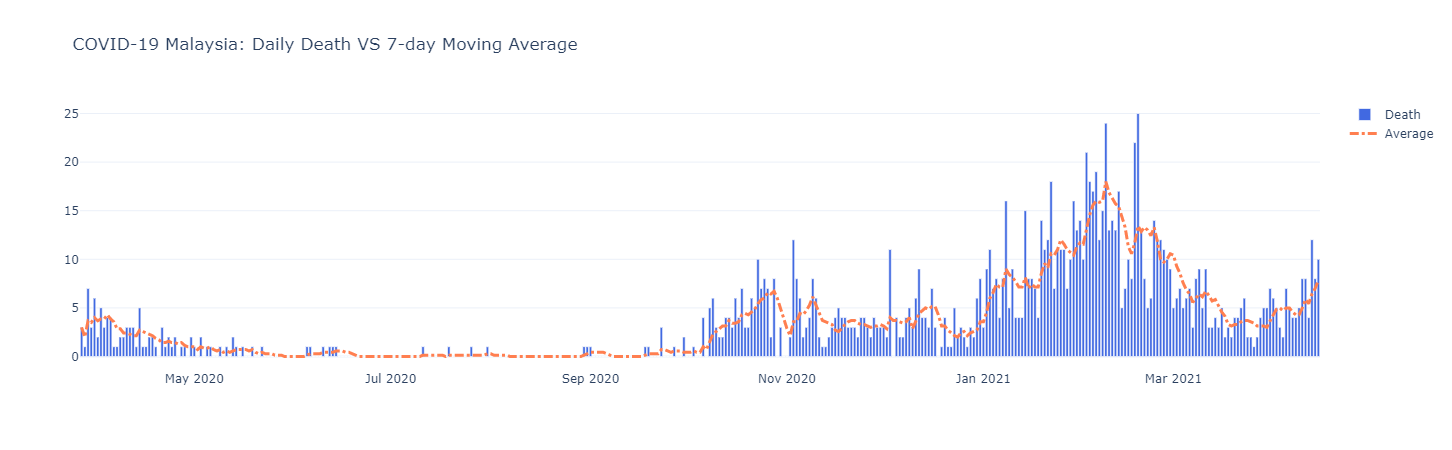

In [317]:
fig = go.Figure()
fig.add_trace(go.Bar(x=df.index, y=df['Death'],
                     marker_color='royalblue',
                     name='Death'))
fig.add_trace(go.Scatter(x=df.index, y=df['SMA_death'],
                         line=dict(color='coral', dash='dashdot', width=3),
                         name='Average'))
fig.update_layout(title='COVID-19 Malaysia: Daily Death VS 7-day Moving Average')
fig.update_layout(hovermode="x unified")
# fig.update_xaxes(rangeslider_visible=True)
fig.show()

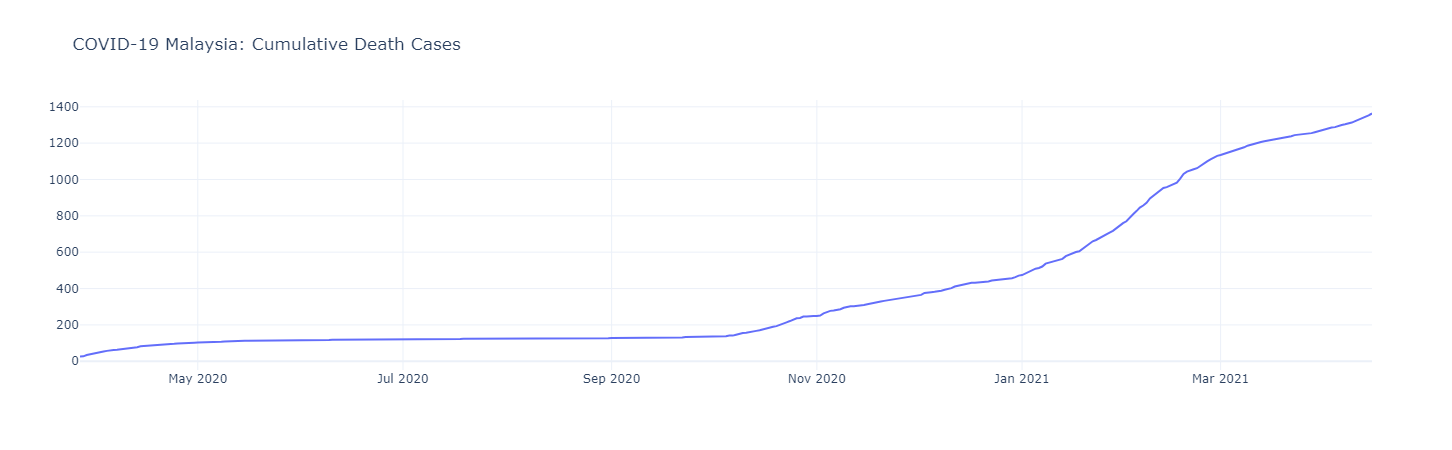

In [11]:
fig = px.line(df, x=df.index, y='Cumulative Death', title='COVID-19 Malaysia: Cumulative Death Cases')
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()

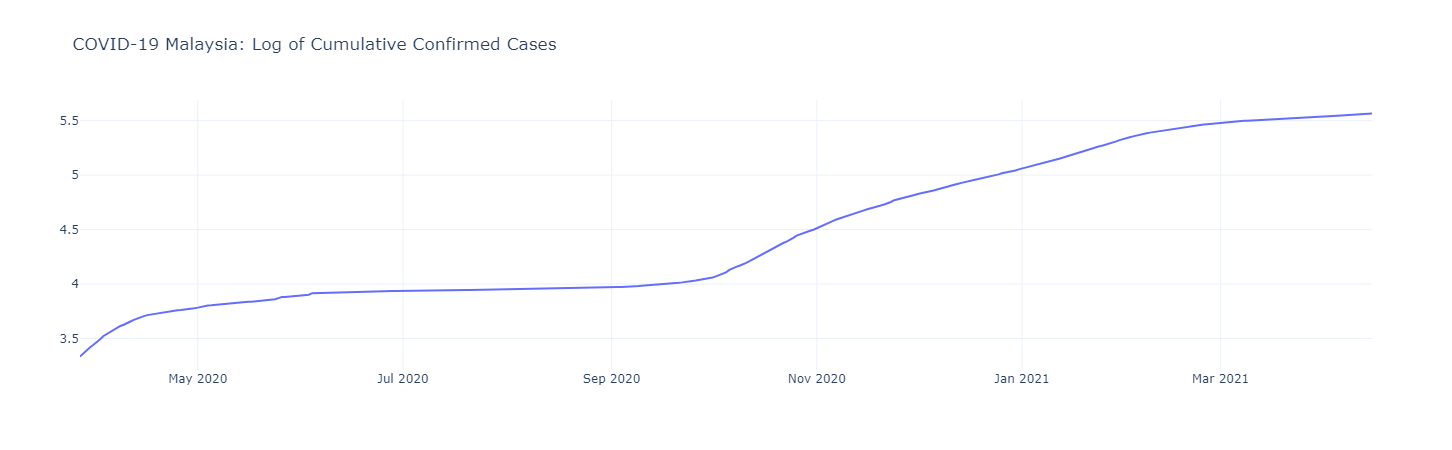

In [12]:
fig = px.line(df, x=df.index, y=np.log10(df['Cumulative Case']), title='COVID-19 Malaysia: Log of Cumulative Confirmed Cases')
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()

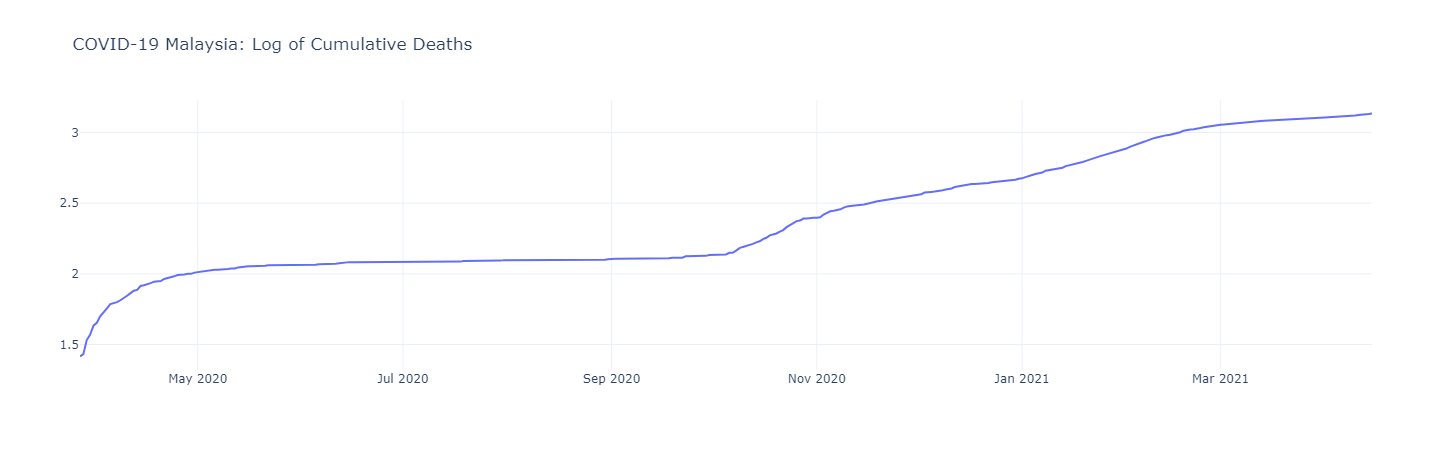

In [13]:
fig = px.line(df, x=df.index, y=np.log10(df['Cumulative Death']), title='COVID-19 Malaysia: Log of Cumulative Deaths')
fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()

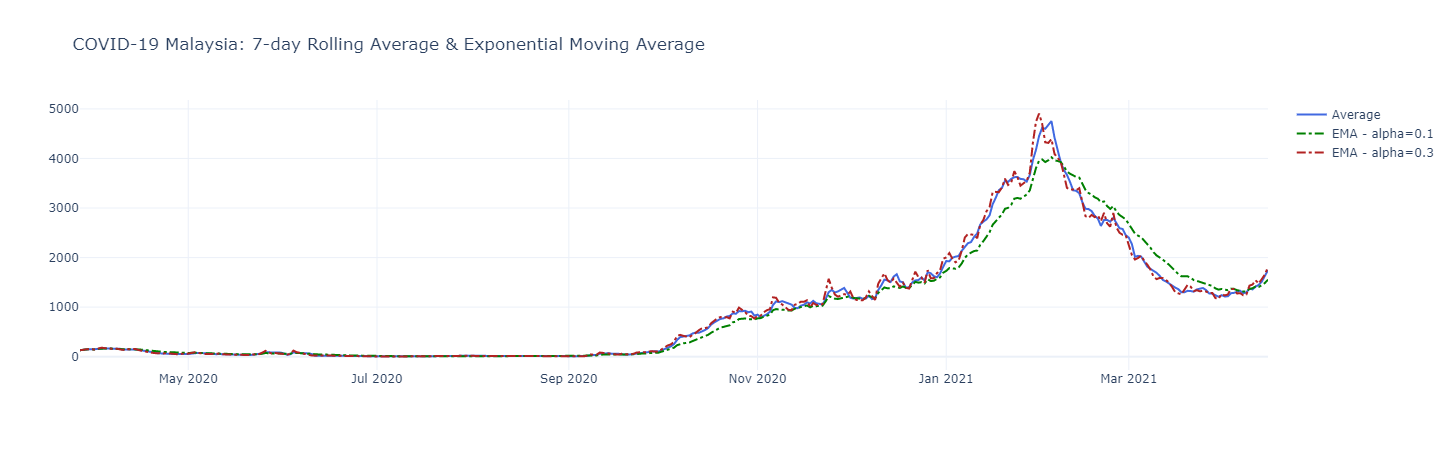

In [14]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['SMA_new'],
                         line=dict(color='royalblue'),
                         name='Average'))
fig.add_trace(go.Scatter(x=df.index, y=df['EMA_0.1'],
                         line=dict(color='green', dash='dashdot'),
                         name='EMA - alpha=0.1'))
fig.add_trace(go.Scatter(x=df.index, y=df['EMA_0.3'],
                         line=dict(color='firebrick', dash='dashdot'),
                         name='EMA - alpha=0.3'))
fig.update_layout(title='COVID-19 Malaysia: 7-day Rolling Average & Exponential Moving Average')
# fig.update_xaxes(rangeslider_visible=True)
fig.show()

# Monthly data

In [244]:
df_m = pd.read_csv('monthly_sum.csv')
df_m.Date = pd.to_datetime(df_m.Date, format='%Y-%m-%d')
df_m.set_index('Date', inplace=True)
df_m.head()

,Recovered,Cumulative Recovered,Imported Case,Local Case,Active Case,New Case,Cumulative Case,ICU,Ventilator,Death,Cumulative Death,SMA_new,EMA_0.1,EMA_0.3,SMA_death
Date,,,,,,,,,,,,,,,
2020-03-01,322,1983,0.0,0.0,10193,735,12343,388,262,20,167,716.58,719.16,724.15,16.17
2020-04-01,3634,76354,0.0,0.0,66293,3236,145040,1881,1003,59,2393,3510.32,3880.68,3446.86,69.12
2020-05-01,2182,167455,0.0,0.0,43881,1817,214779,480,194,13,3443,1821.58,1931.42,1814.24,15.98
2020-06-01,2001,225307,0.0,0.0,23842,820,252725,124,85,6,3576,963.73,1244.49,945.47,6.02
2020-07-01,290,264528,0.0,0.0,3646,337,271966,88,36,4,3792,313.71,348.92,319.02,2.95


In [292]:
def plot_bar(y):
    fig = px.bar(df_m, x=df_m.index, y=y, text=y, color=y,
                 title=f'COVID-19 Malaysia: Monthly {y}',
                 color_continuous_scale='teal')
    fig.update_xaxes(dtick="M1", tickformat="%b\n%Y")
    fig.update_traces(texttemplate='%{text:,}')
    fig.update_layout(xaxis_title=None, yaxis_title=None,
                      uniformtext_minsize=8, uniformtext_mode='hide',
                      coloraxis_showscale=False)
    fig.show()

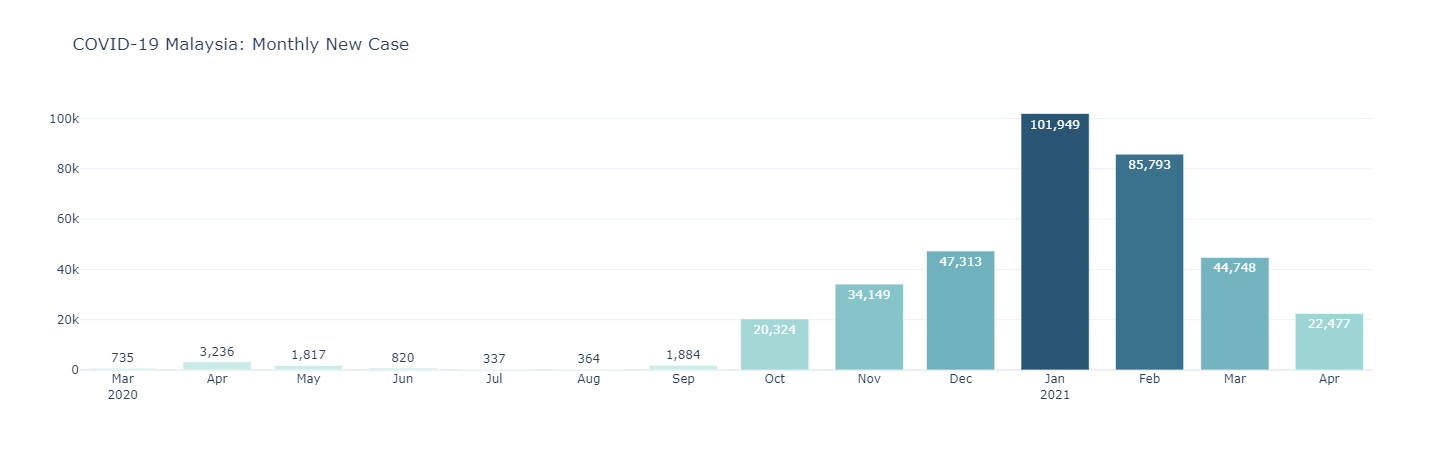

In [293]:
plot_bar('New Case')

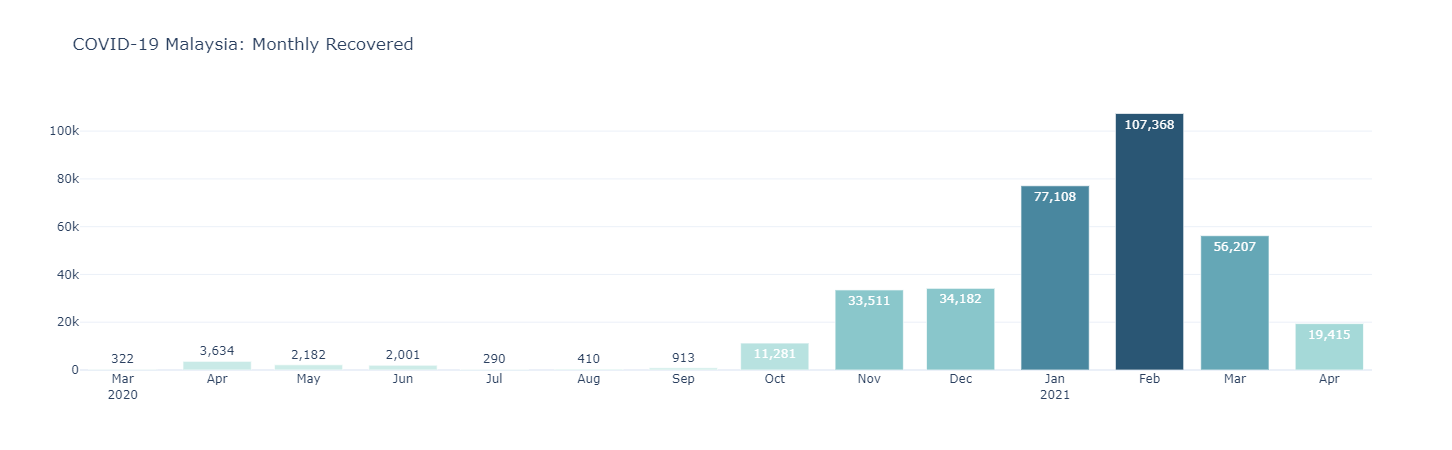

In [294]:
plot_bar('Recovered')

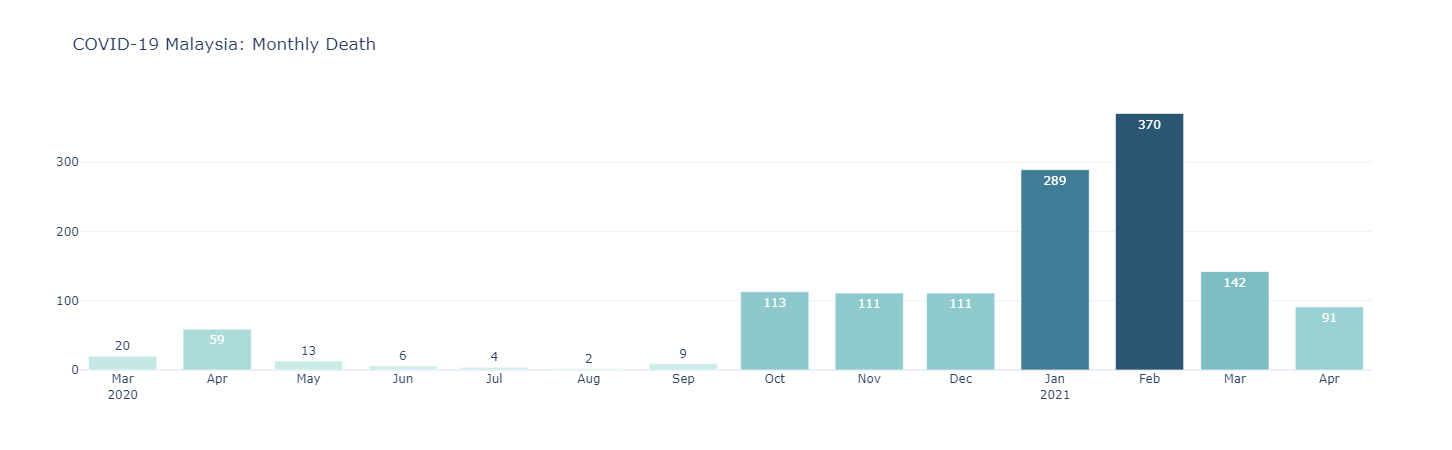

In [295]:
plot_bar('Death')

# State data

In [166]:
dfState = pd.read_csv('state_all.csv')
dfStateCumu = pd.read_csv('state_cumu.csv')

dfState.Date = pd.to_datetime(dfState.Date)
dfStateCumu.Date = pd.to_datetime(dfStateCumu.Date)

dfState.set_index('Date', inplace=True)
dfStateCumu.set_index('Date', inplace=True)

In [167]:
dfState.head()

,JOHOR,KEDAH,KELANTAN,MELAKA,NEGERI SEMBILAN,PAHANG,PERAK,PERLIS,PULAU PINANG,SABAH,SARAWAK,SELANGOR,TERENGGANU,WP KUALA LUMPUR,WP LABUAN,WP PUTRAJAYA
Date,,,,,,,,,,,,,,,,
2020-03-27,20,1,4,0,6,4,8,0,6,10,15,36,2,16,0,2
2020-03-28,26,1,10,9,15,14,6,0,6,15,8,33,4,7,5,0
2020-03-29,24,1,15,1,9,12,11,0,1,0,11,33,2,28,0,2
2020-03-30,24,2,4,7,10,3,8,1,1,4,6,60,0,24,0,2
2020-03-31,16,0,4,2,9,3,5,1,6,5,21,32,0,34,0,2


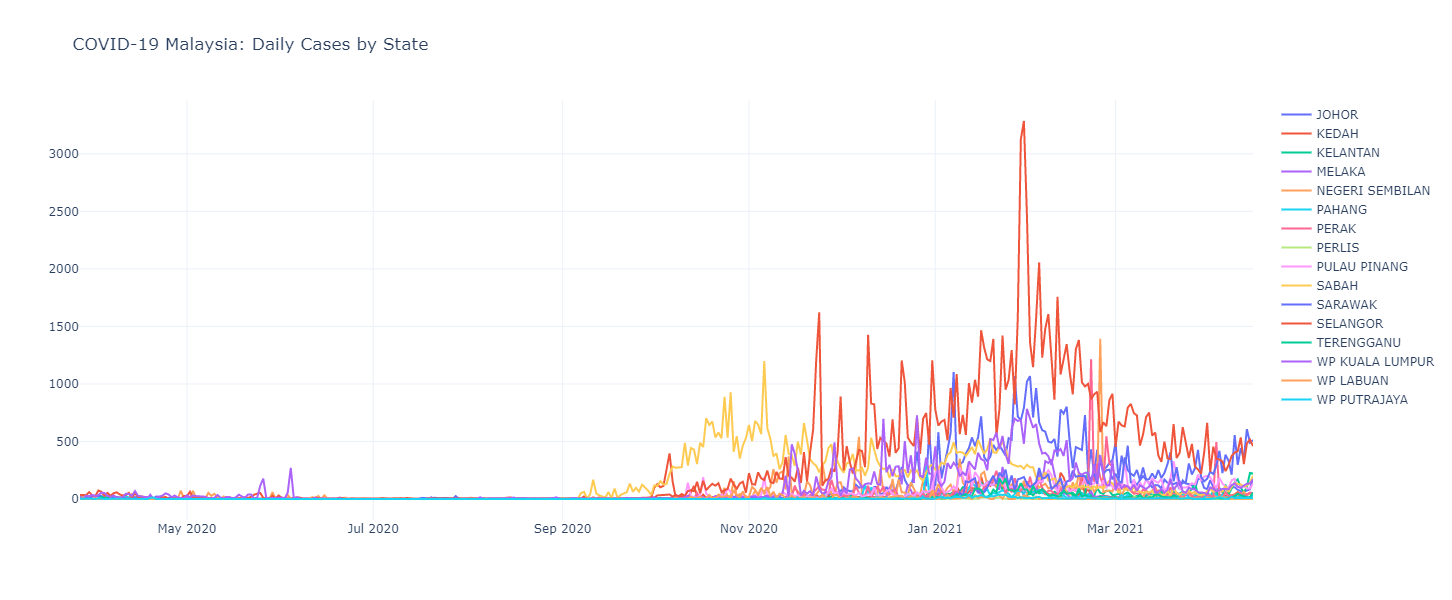

In [337]:
fig = go.Figure()
for col in dfState.columns:
    fig.add_trace(go.Scatter(x=dfState.index,
                             y=dfState[col],
                             name=col,
                             visible=True
                            )
                 )
fig.update_layout(title='COVID-19 Malaysia: Daily Cases by State', height=600)
fig.show()

In [359]:
df_state_total = dfStateCumu.iloc[[-1]].T.reset_index()
df_state_total.columns = ['State', 'Confirmed']
df_state_total['State'] = df_state_total['State'] + '  '
df_state_total

,State,Confirmed
0,JOHOR,42708
1,KEDAH,8971
2,KELANTAN,7727
3,MELAKA,6850
4,NEGERI SEMBILAN,17731
5,PAHANG,4613
6,PERAK,13935
7,PERLIS,343
8,PULAU PINANG,17993
9,SABAH,56367


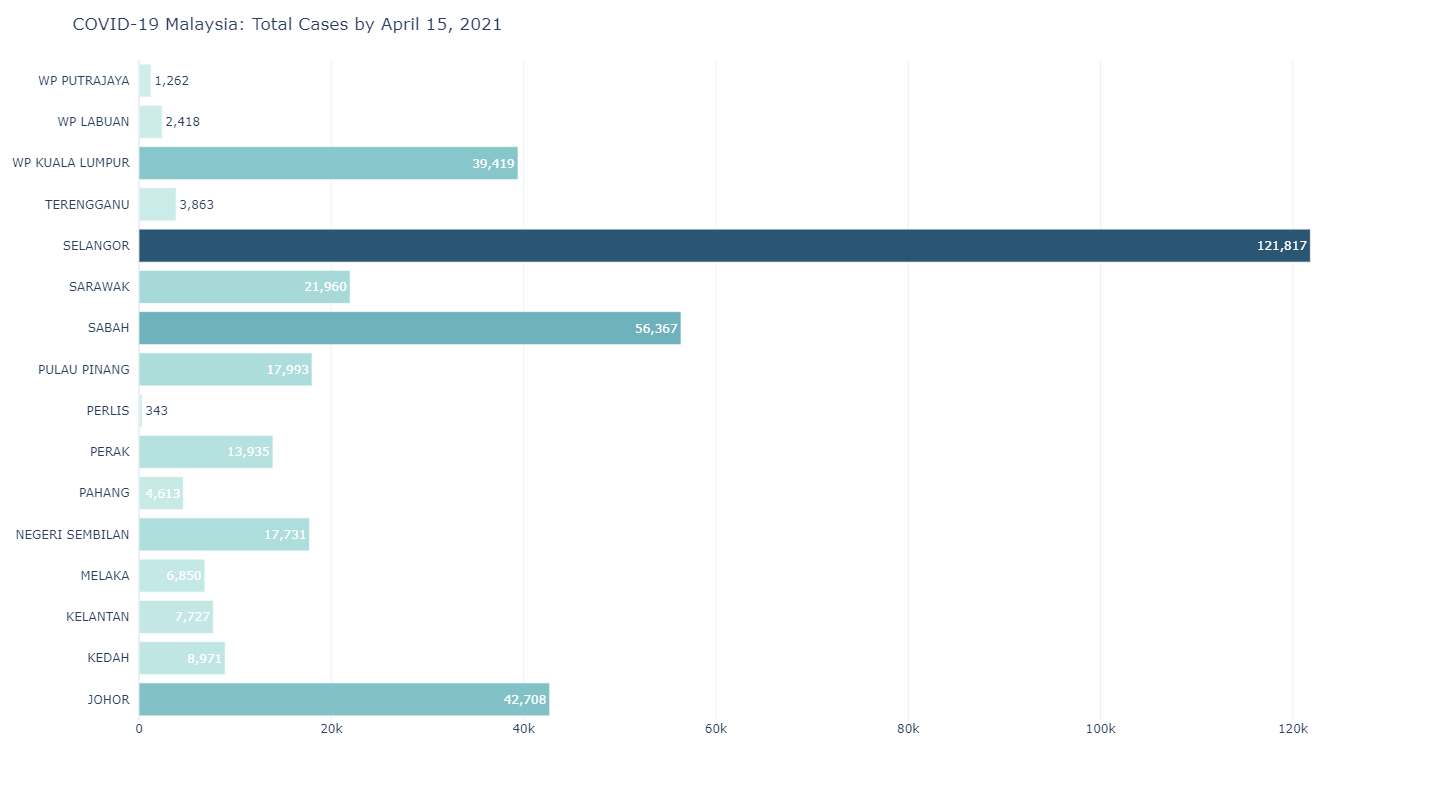

In [372]:
fig = px.bar(df_state_total, x='Confirmed', 
             y='State', text='Confirmed', 
             color='Confirmed',
             color_continuous_scale='teal', 
             hover_name='State', 
             hover_data={'State': False, 'Confirmed': False}
            )
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',
                  title='COVID-19 Malaysia: Total Cases by April 15, 2021',
                  width=800, height=800,
                  xaxis_title=None, yaxis_title=None,
                  showlegend=False, coloraxis_showscale=False)
fig.update_traces(texttemplate='%{text:,}')
fig.show(config={"displayModeBar": False, "showTips": False})

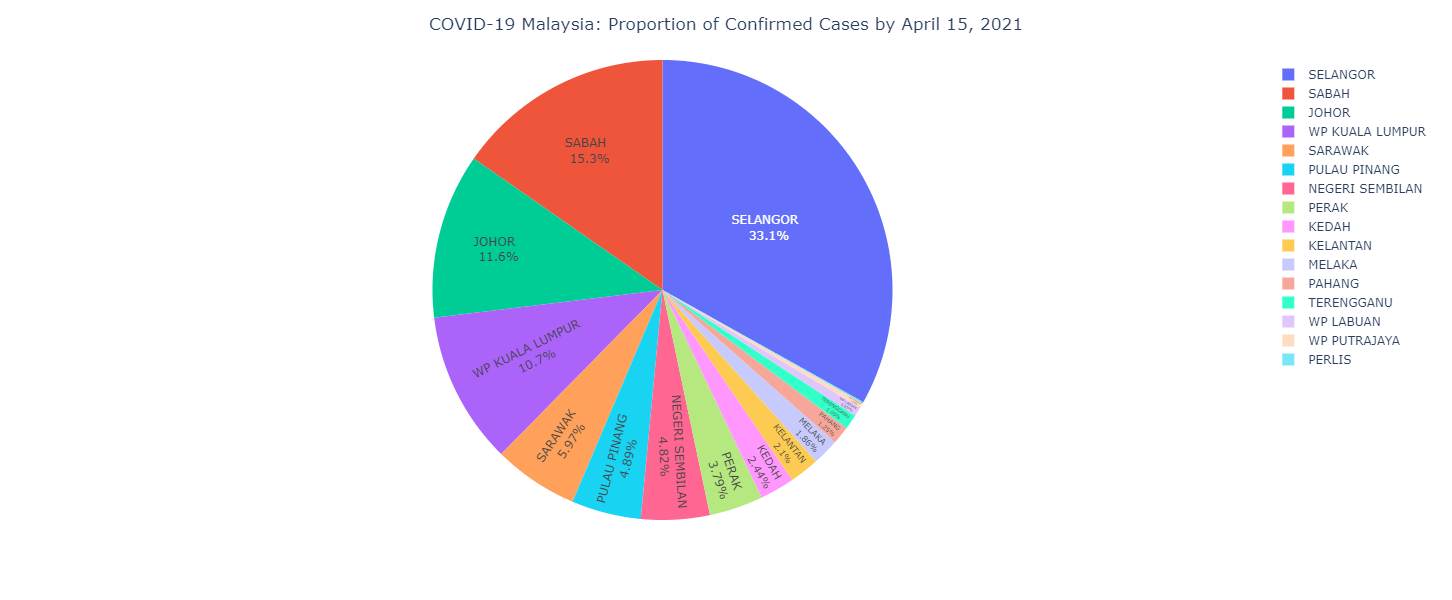

In [373]:
fig = px.pie(df_state_total, values='Confirmed', names='State', height=600)
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(
    title='COVID-19 Malaysia: Proportion of Confirmed Cases by April 15, 2021',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))

fig.show()

In [380]:
with open('malaysia.geojson', 'r') as f:
    msia_geojson = json.load(f)

In [395]:
for feature in msia_geojson['features']:
    print(feature['properties'])
    # if 'phg' in feature['properties']['name']:
    #     print(feature)
    #     print()

{'name': 'kulsgr'}
{'name': 'lbnocn'}
{'name': 'pjysgr'}
{'name': 'jhrmlk'}
{'name': 'jhrnsn'}
{'name': 'jhrphg'}
{'name': 'jhrocn'}
{'name': 'kdhpng'}
{'name': 'kdhprk'}
{'name': 'kdhpls'}
{'name': 'kdhtha'}
{'name': 'kdhocn'}
{'name': 'ktnphg'}
{'name': 'ktnprk'}
{'name': 'ktntrg'}
{'name': 'ktntha'}
{'name': 'ktnocn'}
{'name': 'mlknsn'}
{'name': 'mlkocn'}
{'name': 'nsnphg'}
{'name': 'nsnsgr'}
{'name': 'nsnocn'}
{'name': 'phgprk'}
{'name': 'phgsgr'}
{'name': 'phgtrg'}
{'name': 'phgocn'}
{'name': 'pngprk'}
{'name': 'pngocn'}
{'name': 'pngocn2'}
{'name': 'prksgr'}
{'name': 'prktha'}
{'name': 'prkocn'}
{'name': 'plstha'}
{'name': 'plsocn'}
{'name': 'sbhsrw'}
{'name': 'sbhind'}
{'name': 'sbhocn'}
{'name': 'srwbru'}
{'name': 'srwbru2'}
{'name': 'srwind'}
{'name': 'srwocn'}
{'name': 'srwocn2'}
{'name': 'srwocn3'}
{'name': 'sgrocn'}
{'name': 'trgocn'}


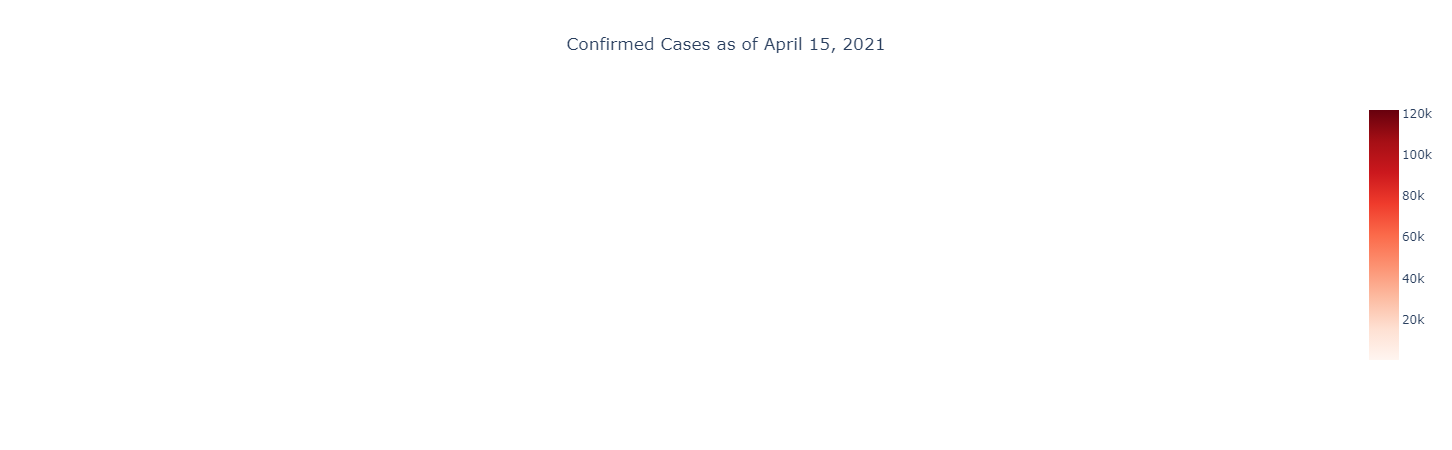

In [378]:
fig = go.Figure(data=go.Choropleth(
    locations = df_state_total['State'],
    z = df_state_total['Confirmed'],
    colorscale = 'Reds',
    marker_line_color = 'black',
    marker_line_width = 0.5,
))
fig.update_layout(
    title_text = 'Confirmed Cases as of April 15, 2021',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
        projection_type = 'equirectangular'
    )
)